In [1]:
import yfinance as yf

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
ticker_symbol="AAPL"
ticker=yf.Ticker(ticker_symbol)


In [4]:
historical_data= ticker.history(period="1y")
print("Historical data:")
print(historical_data)

Historical data:
                                 Open        High         Low       Close  \
Date                                                                        
2024-05-06 00:00:00-04:00  181.493040  183.334337  179.572103  180.856049   
2024-05-07 00:00:00-04:00  182.587839  184.031021  180.467859  181.542770   
2024-05-08 00:00:00-04:00  181.990679  182.209646  180.597249  181.881195   
2024-05-09 00:00:00-04:00  181.702028  183.792164  181.254145  183.702591   
2024-05-10 00:00:00-04:00  184.280653  184.470019  181.519943  182.436859   
...                               ...         ...         ...         ...   
2025-04-29 00:00:00-04:00  208.690002  212.240005  208.369995  211.210007   
2025-04-30 00:00:00-04:00  209.300003  213.580002  206.669998  212.500000   
2025-05-01 00:00:00-04:00  209.080002  214.559998  208.899994  213.320007   
2025-05-02 00:00:00-04:00  206.089996  206.990005  202.160004  205.350006   
2025-05-05 00:00:00-04:00  203.125000  204.100006  199.1199

In [5]:
df=historical_data

In [7]:
data=df

In [8]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-05-06 00:00:00-04:00,181.493040,183.334337,179.572103,180.856049,78569700,0.00,0.0
2024-05-07 00:00:00-04:00,182.587839,184.031021,180.467859,181.542770,77305800,0.00,0.0
2024-05-08 00:00:00-04:00,181.990679,182.209646,180.597249,181.881195,45057100,0.00,0.0
2024-05-09 00:00:00-04:00,181.702028,183.792164,181.254145,183.702591,48983000,0.00,0.0
2024-05-10 00:00:00-04:00,184.280653,184.470019,181.519943,182.436859,50759500,0.25,0.0
...,...,...,...,...,...,...,...
2025-04-29 00:00:00-04:00,208.690002,212.240005,208.369995,211.210007,36827600,0.00,0.0
2025-04-30 00:00:00-04:00,209.300003,213.580002,206.669998,212.500000,52286500,0.00,0.0
2025-05-01 00:00:00-04:00,209.080002,214.559998,208.899994,213.320007,57365700,0.00,0.0


In [9]:
# Calculate 50-day and 200-day moving averages
data['50_MA'] = data['Close'].rolling(window=50).mean()
data['200_MA'] = data['Close'].rolling(window=200).mean()


In [10]:
# Function to identify trends
def identify_trends(data):
    if data['Close'] > data['50_MA']:
        return 'Uptrend'
    elif data['Close'] < data['50_MA']:
        return 'Downtrend'
    else:
        return 'Sideways'


In [11]:
# Apply the function to the DataFrame
data['Trend'] = data.apply(identify_trends, axis=1)


In [12]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,50_MA,200_MA,Trend
Date,,,,,,,,,,
2024-05-06 00:00:00-04:00,181.493040,183.334337,179.572103,180.856049,78569700,0.00,0.0,NaN,NaN,Sideways
2024-05-07 00:00:00-04:00,182.587839,184.031021,180.467859,181.542770,77305800,0.00,0.0,NaN,NaN,Sideways
2024-05-08 00:00:00-04:00,181.990679,182.209646,180.597249,181.881195,45057100,0.00,0.0,NaN,NaN,Sideways
2024-05-09 00:00:00-04:00,181.702028,183.792164,181.254145,183.702591,48983000,0.00,0.0,NaN,NaN,Sideways
2024-05-10 00:00:00-04:00,184.280653,184.470019,181.519943,182.436859,50759500,0.25,0.0,NaN,NaN,Sideways
...,...,...,...,...,...,...,...,...,...,...
2025-04-29 00:00:00-04:00,208.690002,212.240005,208.369995,211.210007,36827600,0.00,0.0,217.669601,227.117564,Downtrend
2025-04-30 00:00:00-04:00,209.300003,213.580002,206.669998,212.500000,52286500,0.00,0.0,217.030201,227.031225,Downtrend
2025-05-01 00:00:00-04:00,209.080002,214.559998,208.899994,213.320007,57365700,0.00,0.0,216.399201,226.929751,Downtrend


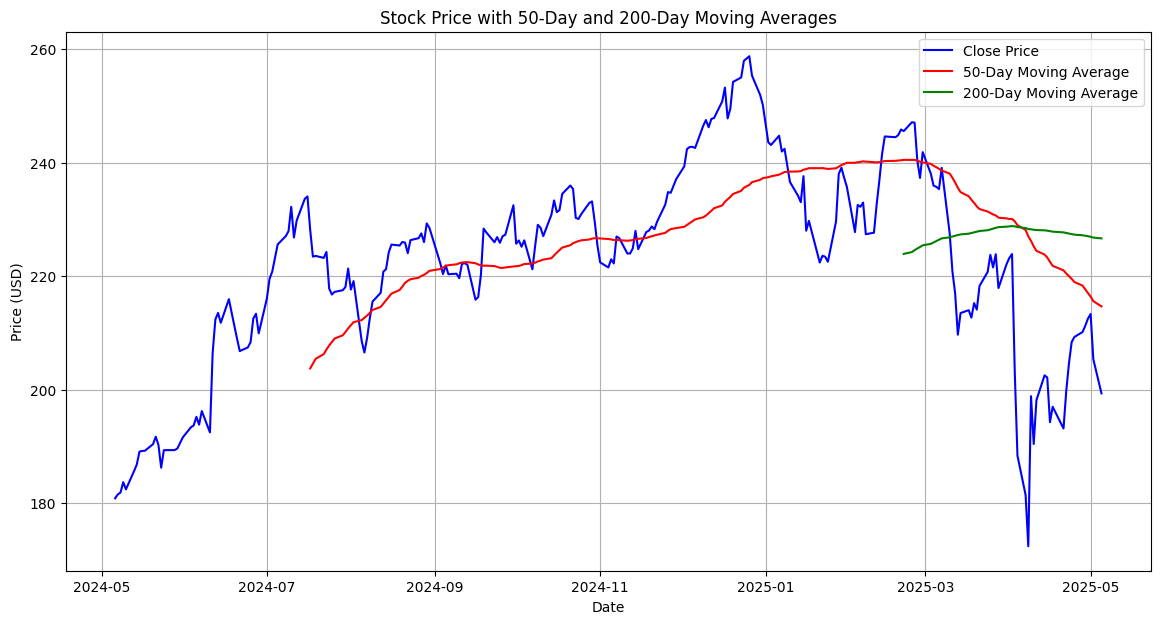

In [13]:
# Plot the closing price and moving averages
plt.figure(figsize=(14,7))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['50_MA'], label='50-Day Moving Average', color='red')
plt.plot(data['200_MA'], label='200-Day Moving Average', color='green')
plt.title('Stock Price with 50-Day and 200-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()



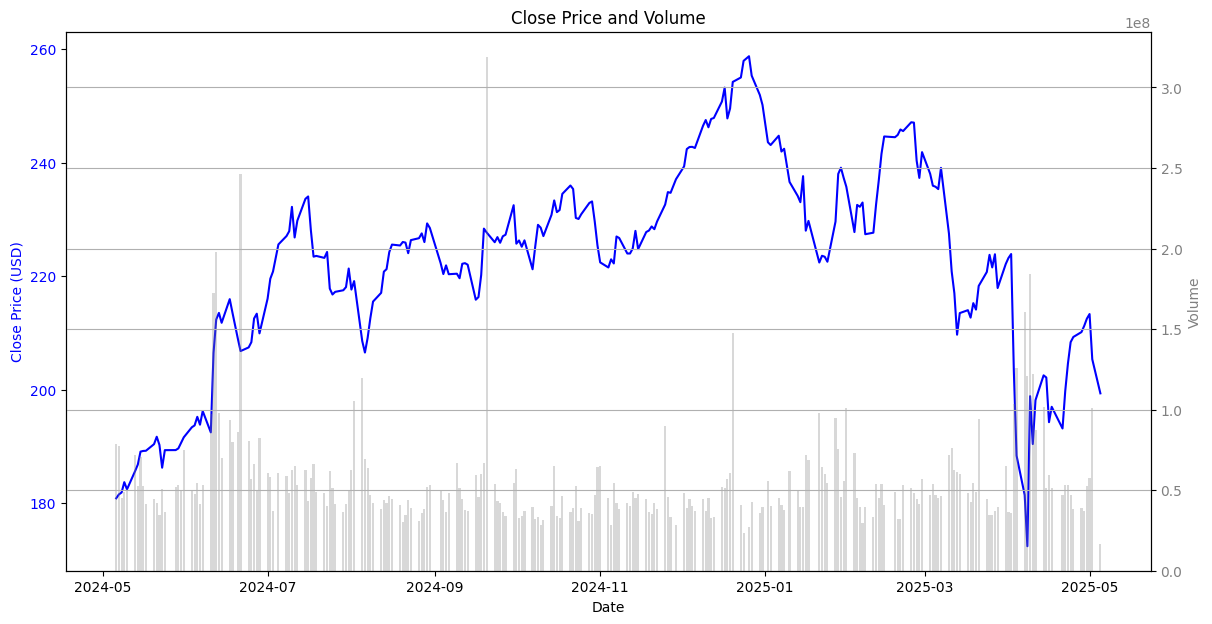

In [14]:
# Plot Close Price and Volume in a combo chart
fig, ax1 = plt.subplots(figsize=(14,7))
ax1.plot(data['Close'], color='blue', label='Close Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.bar(data.index, data['Volume'], color='gray', alpha=0.3, label='Volume')
ax2.set_ylabel('Volume', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

plt.title('Close Price and Volume')
plt.grid(True)
plt.show()


In [15]:
# Save data to CSV (optional)
data.to_csv('stock_analysis.csv')
